# R5 - Disparity and Rendering

Since R5 images are not too big, it can be possible to play around with a notebook - it gives us more space for testing and add explanation close to the code.

### HOW TO USE THIS NOTEBOOK

I suggest you read it before (it should be visible with images) and try to understand what I did, then play around and try to re-do it locally and change what you need.
Sometimes I changed the code during the execution to show some improvements, so if you re-run you will get the new version of the outputs (it is intended to be this way).

## SETUP

#### NB: if you have the toolbox already running, skip this part and go to the DISPARITY part

Check that you are in the correct folder

In `PlenopticToolbox2.0/python/samples`


In [1]:
!echo $PWD

/Users/Palma/Documents/Githubs/PlenopticToolbox2.0/python/samples


The output should be `path_to_the_toolbox/PlenopticToolbox2.0/python/samples`

You should have this already configured, but otherwise, these are the commands to export the PYTHONPATH variable so python knows where to look for the files. It may work from the notebook, but actually for me it does not. But you can close, execute the commands and open again the notebook.

In [10]:
!echo "we set as PYTHONPATH the path $(dirname "$PWD") - it should be the python folder!"
!export PYTHONPATH="$(dirname "$PWD")"
!printenv | grep PYTHONPATH

we set as PYTHONPATH the path /Users/Palma/Documents/Githubs/PlenopticToolbox2.0/python - it should be the python folder!


Also, the setup file need to be run. Only the first time, as said, if you have everything running, just skip this

In [5]:
# build the cython files
!cd .. && python3 setup.py build_ext --inplace

running build_ext
building 'disparity.sgm_cost_path' extension
gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/opt/anaconda3/include -arch x86_64 -I/opt/anaconda3/include -arch x86_64 -I/opt/anaconda3/lib/python3.7/site-packages/numpy/core/include -I/opt/anaconda3/include/python3.7m -c disparity/sgm_cost_path.c -o build/temp.macosx-10.9-x86_64-3.7/disparity/sgm_cost_path.o
In file included from disparity/sgm_cost_path.c:611:
In file included from /opt/anaconda3/lib/python3.7/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /opt/anaconda3/lib/python3.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /opt/anaconda3/lib/python3.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1832:
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: 
      "Using deprecated NumPy API, disable it with "          "#define
 

Move the file created in the right folder (if the file has another name, change accordingly)

In [7]:
!mv ../sgm_cost_path.cpython-37m-darwin.so ../disparity/sgm_cost_path/sgm_cost_path.cpython-37m-darwin.so

We need the path to the image and the .xml file

In [1]:
!folder="/Users/Palma/Documents/Projects/PlenopticToolbox2.0/Discussion"
!img_path="${folder}/R5.png"
!xml_path="${folder}/R5.xml"
import os
folder = '/Users/Palma/Documents/Projects/PlenopticToolbox2.0/Discussion'
image_path = os.path.join(folder, 'R5.png')
xml_path = os.path.join(folder, 'R5.xml')
# check if actually the files exist
if os.path.exists(image_path):
    print("image found at {imgpath}".format(imgpath = image_path))
else:
    print("no file found at {imgpath}. Sure you wrote correct?".format(imgpath = image_path))
if os.path.exists(xml_path):
    print(".xml found at {xml_path}".format(xml_path = xml_path))
else:
    print("no file found at {xml_path}. Sure you wrote correct?".format(xml_path = xml_path))

image found at /Users/Palma/Documents/Projects/PlenopticToolbox2.0/Discussion/R5.png
.xml found at /Users/Palma/Documents/Projects/PlenopticToolbox2.0/Discussion/R5.xml


## DISPARITY

We start estimating the disparity from the image. Here we can test also different parameters to see which one works best. Depending on computer, it may take a while.

In [2]:
# PARAMETERS
%reload_ext autoreload
%autoreload 2
import disparity.disparity_methods as rtxmain

params = rtxmain.EvalParameters()
params.filename = xml_path
params.coarse = False
params.technique = 'sad' # change to 'ssd' or 'censusv3'
params.method = 'real_lut'
params.min_disp = 0 # change if needed
params.max_disp = 15 # change if needed
params.num_disp = 10 # larger = better = slower. it HAS to be larger than 2 (assert len(x) > 2)
params.scene_type = 'real'
params.analyze_err = False # only if you have ground truth
params.confidence_technique = 'mlm' # or 'rtvbf'
params.format = 'png' # or tiff
params.sparse = False # it saves also a sparser disparity
params.save_parameters = True # important for the .json file
params.save_conf = True
params.output_path = folder # or change if wanted

full_name, nothing = params.filename.split('.xml')
separate_names = full_name.split('/')
pic_name = separate_names[len(separate_names)-1]
print("images name: {}.png".format(pic_name))

images name: R5.png


**NB:** If an error about missing sgm.cost_path or similar appears, the problem is related to the cython files. Please re-launch setup as explained above or check again the full guide [here](https://github.com/PlenopticToolbox/PlenopticToolbox2.0/tree/master/python)

In [3]:
# COMPUTE DISPARITY
print("this may take a while..")
I, disp, Dwta, Dgt, Dconf, Dcoarse, disparities, ncomp, disp_avg, new_offset, error_measurements, central_lens = rtxmain.estimate_disp(params)


this may take a while..
******************
Loading the scene..

Disparities: [ 0.   1.5  3.   4.5  6.   7.5  9.  10.5 12.  13.5]
Selection strategy: <function real_lut at 0x1c2db2e0e0>

Step 1) Calculating the costs..

Building Cost Volume: processing microlens 08700/08787
Done!
Num comparisons: 114240


Step 2) Regularizing and extracing disparity map..

Regularization: Processing lens 08700/08787
Done!


Now we have image and disparity.

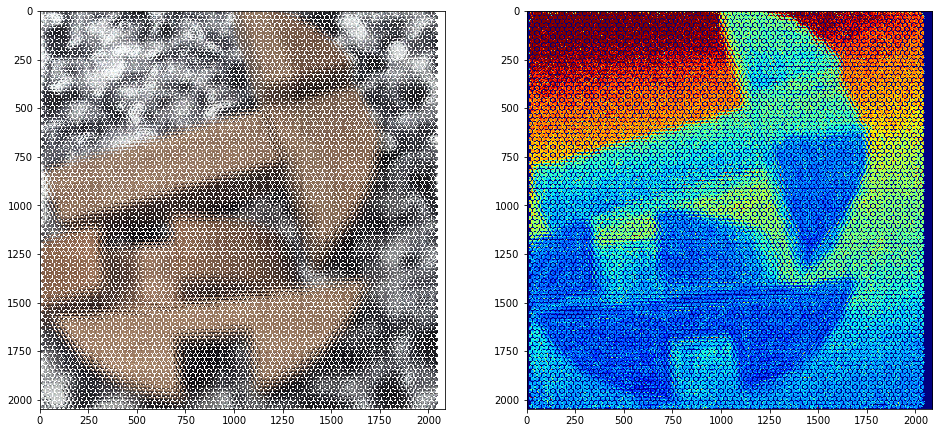

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(disp, cmap='jet', vmin=3, vmax=9)

In [5]:
# SAVING STUFF
import json
out_folder = '/Users/Palma/Documents/Projects/PlenopticToolbox2.0/Discussion/'parameters = dict()
parameters['dmin'] = disparities[0]
parameters['dmax'] = disparities[-1]
parameters['disparities'] = disparities.tolist()
parameters['technique'] = params.technique
parameters['conf'] = params.confidence_technique
parameters['method'] = params.method
parameters['pic_name'] = pic_name

json_name = out_folder + 'parameters.json'

with open(json_name, 'w') as outfile:
    json.dump(parameters, outfile)

In [6]:
# saving the images
plt.imsave(out_folder + 'img.png', I)
plt.imsave(out_folder + 'disp.png', disp)
plt.imsave(out_folder + 'conf.png', Dconf)
plt.imsave(out_folder + 'wta.png', Dwta)


## RENDER

Now we can proceed to the rendering

First with the third generation script for rendering, the one that should work better with the higher resolution.

In [2]:
%reload_ext autoreload
%autoreload 2
import rendering.render as rtxrnd
import plenopticIO.imgIO as xmlio
import json
out_folder = '/Users/Palma/Documents/Projects/PlenopticToolbox2.0/Discussion/'
with open(out_folder + 'parameters.json') as json_file:
    parameters = json.load(json_file)
images_paths = [out_folder + 'img.png', out_folder + 'disp.png', out_folder + 'conf.png']
usingInterpolationAtFirstStep = False
images, calibs, interps = xmlio.load_files(out_folder + 'R5.xml', images_paths, usingInterpolationAtFirstStep)
x_shift, y_shift = 0, 0
sample_per_lens = 7 # a higher number will have higher resolution, but too high may result in additional artifacts!
view, coarse_disp, fine_disp = rtxrnd.render_SI(images, interps, calibs, parameters, x_shift, y_shift, sample_per_lens, True, usingInterpolationAtFirstStep)


ModuleNotFoundError: No module named 'rendering'

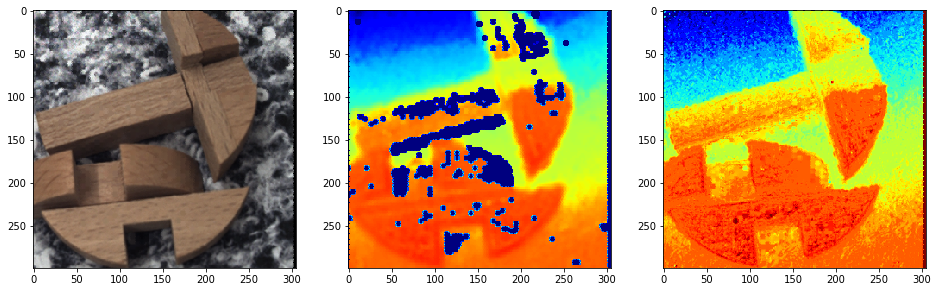

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(view)
plt.subplot(132)
plt.imshow(coarse_disp, cmap='jet', vmin=0.15, vmax=0.202)
plt.subplot(133)
plt.imshow(fine_disp, cmap='jet', vmin=0.15, vmax=0.202)

What we see is actually that the disparity range is extremely small, between 0.15 and 0.2. 
This is of course depending on the parameters I used for the minimum and maximum disparity, but still, it should not be so small. I used 0 and 15 in this case, maybe too much, but disparity should have some range, otherwise it's very difficult to estimate.
It seems the optics are not the best fit for the scene. If you would manage to find a better optical configuration, where the disparity range would be higher, the disparity estimation would also get less noisy results. 

Nevertheless, the disparity with filled holes looks ok, the rendered image still have some rendering artifacts at the top. 
It seems the relation between disparity values and patch size is a bit different with respect to the R29. It may be that without having an actual calibration, some small artifacts will still appear in the rendering.

Here I changed only the `line 1429` of the `render.py` file.

```patch_size_for_sampling = single_val_disp * calib.lens_diameter```

Now the patch size depends on the lens diameter. Before it was set to 

```patch_size_for_sampling = single_val_disp * info['dmax'] / 2```

Where `info['dmax']` was the highest disparity used in the estimation. 
So now it should be more invariant to the disparity range selected in the estimation, which is what we want

### Render_view_2g.py
There is also the possibility to render from the old script.

In [9]:
raw_images, interp_images, calibs = xmlio.load_raw_and_interp(out_folder + 'img.png', out_folder + 'disp.png', out_folder + 'R5.xml')
view_2g, coarse_disp_2g, disp_2g = rtxrnd.render_interp_img_and_disp(raw_images, interp_images, calibs, x_shift, y_shift, sample_per_lens, True)

raw image is 2047x2088, rendered image will be 245x250


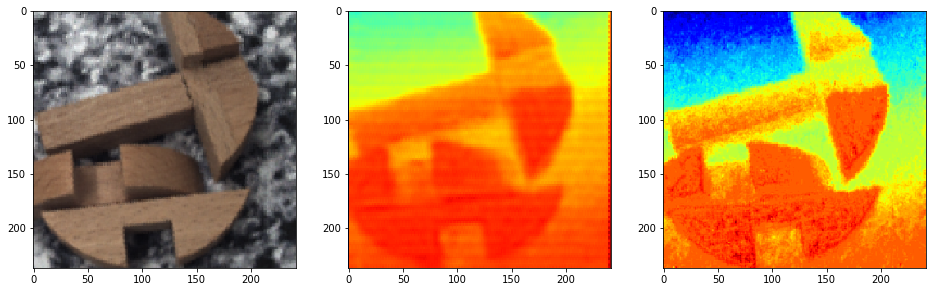

In [55]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(view_2g)
plt.subplot(132)
plt.imshow(coarse_disp_2g, cmap='jet', vmin=0.15, vmax=0.215)
plt.subplot(133)
plt.imshow(disp_2g, cmap='jet', vmin=0.15, vmax=0.202)

The second generation rendering has less quality (as expected, that's why I did the third generation), I tested because in some comments it looked like that problems were not arising with this one, but I see the same problems, plus a lower spatial resolution. Also between coarse and fine disp there is a shift in the values, not sure why. But we do not need this, it is more of a comparison to understand better why we are using the new rendering algorithm.

### Looking at the lens ranges

Now we can take a look at the range of each lens type in the image

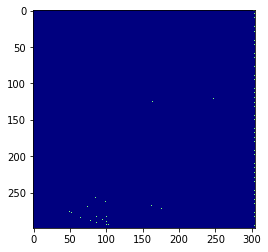

In [5]:
# this was the default setup
range_t0 = [0.400, 1]
range_t1 = [0, 0.200]
range_t2 = [0.200, 0.400]
lens_types = np.zeros_like(fine_disp)
lens_types += (fine_disp > 0.2).astype(int) * (fine_disp < 0.4).astype(int) # range t2 will have value 1
lens_types += (fine_disp > 0.4).astype(int) # range t0 will have value 2
plt.imshow(lens_types, cmap='jet', vmin=0, vmax=2)
plt.show()

The default setup would assume disparities in the range [0, 1], so it would be terrible in the range [0.15, 0.21] that we have on our image. So we need to normalize the disparities we have to [0,1], or our range to [0.15, 0.21].
I think the first option is the easier for now.

Now I write a little script to show the division of the lens type during the rendering.
The idea is to have *regions* of the scene where we use each lens.

0.0
1.0


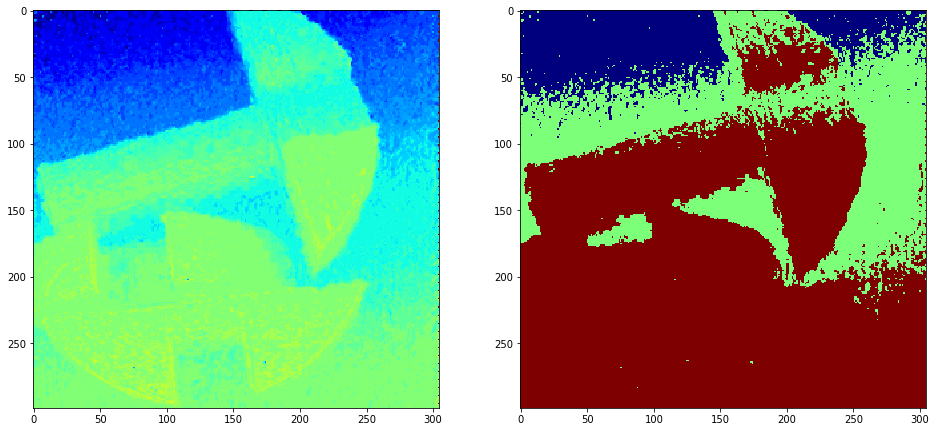

In [6]:
min_val = np.min(fine_disp[15:-15, 15:-15]) # there is a border with 0s values that could affect min_val
max_val = np.max(fine_disp)
fine_disp_normalized = np.clip((fine_disp - min_val) / (max_val - min_val), 0, 1)
print(np.min(fine_disp_normalized))
print(np.max(fine_disp_normalized))
# we re-organize the value for easier reading
range_t0 = [0, 0.200]
range_t1 = [0.200, 0.400]
range_t2 = [0.400, 1]
lens_types_normalized = np.zeros_like(fine_disp_normalized)
lens_types_normalized += (fine_disp_normalized > range_t1[0]).astype(int) # range t2 will have value 1
lens_types_normalized += (fine_disp_normalized > range_t2[0]).astype(int) # range t0 will have value 2
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(fine_disp_normalized, cmap='jet', vmin=0, vmax=1)
plt.subplot(122)
plt.imshow(lens_types_normalized, cmap='jet', vmin=0, vmax=2)
plt.show()

In the above image, left is the disparity normalized and right the regions (blue, green and red) where each lens will be used. It makes sense, after normalization. 

So it looks like what was missing was the normalization step on the disparity map. Or maybe also the range need to be adapted. 
First we can normalize the disparity. We can add the above normalization line in `render.py` at line `1522` like this:

```
    rnd_d_tot = (rnd_disp0 + rnd_disp1 + rnd_disp2 ) / lens_types
    padding = 20
    min_val = np.min(rnd_d_tot[padding:-padding, padding:-padding]) # there is a border with 0s values that could affect min_val
    max_val = np.max(rnd_d_tot[padding:-padding, padding:-padding])
    disp_normalized = np.clip((rnd_d_tot - min_val) / (max_val - min_val), 0, 1)
```

and relaunch the rendering to see the differences

raw image is 2047x2088, rendered image will be 307x313


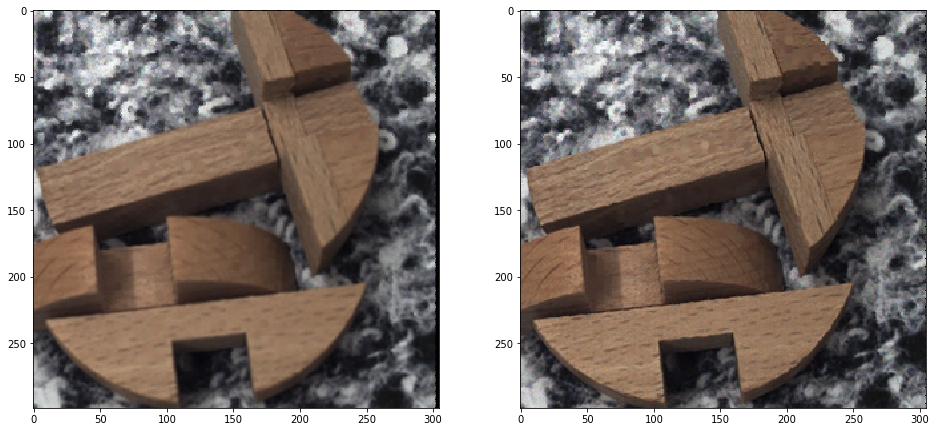

In [12]:
%autoreload 2
import rendering.render as rtxrnd #import again to reload changes!
view_normalized, coarse_normalized, fine_disp_normalized = rtxrnd.render_SI(images, interps, calibs, parameters, x_shift, y_shift, sample_per_lens, True, usingInterpolationAtFirstStep)
import numpy as np
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(view)
plt.subplot(122)
plt.imshow(view_normalized)

It looks better, but still not perfect. Maybe the lens range have to be adjusted.
We try to change the values of the ranges to
```
    range_t1 = [0.600, 1]
    range_t2 = [0, 0.300]
    range_t0 = [0.300, 0.600]
```
and relaunch to see!

raw image is 2047x2088, rendered image will be 307x313
using this values: [0.3, 0.6], [0.6, 1], [0, 0.3]


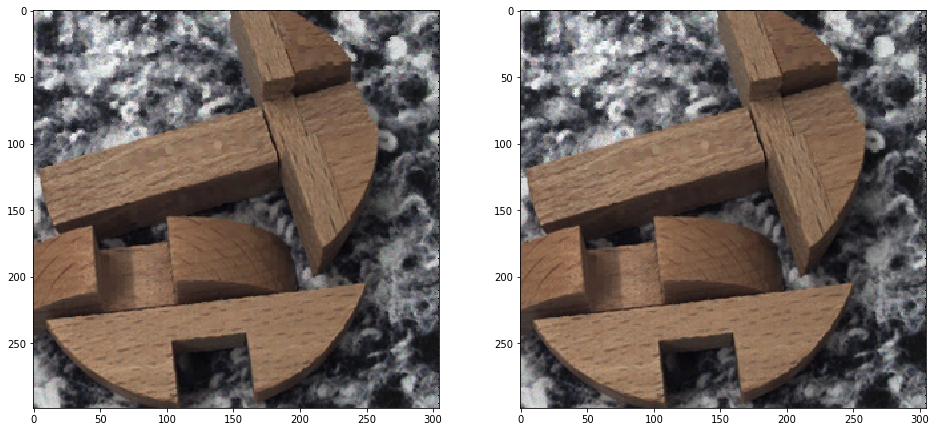

In [18]:
%autoreload 2
import rendering.render as rtxrnd #import again to reload changes!
view_normalized_and_new_range, coarse_normalized_and_new_range, fine_disp_normalized_and_new_range = rtxrnd.render_SI(images, interps, calibs, parameters, x_shift, y_shift, sample_per_lens, True, usingInterpolationAtFirstStep)
import numpy as np
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(view_normalized)
plt.subplot(122)
plt.imshow(view_normalized_and_new_range)

It does not change that much. Here we could take a look at the raw image and try to see which lens are in focus, and try to arrange the range so that these lenses are used.

I agree, this is not the best solution, and it should be automatic. But I did not have the time to finish doing this part, so I was looking for a method that could work in most cases, and the one I used works pretty good at the moment for many images.

## What can I do to improve the image?

Several things, among which:

0 - pull the new changes and try to understand this notebook, discuss if not clear.

1 - Select an appropriate scene for the optical configuration, so that you have a larger depth of field. For example, between 2-3 and 8-9 virtual depth is a nice setup (virtual depth means the number of horizontal adjacent microlens that image the same point), and using virtual depth maybe easier to check using RxLive software during the setup of the scene. This should account for a less noisier disparity map and allow for a better outcome for all the successive calculations (rendering).

2 - find the appropriate lens range for my camera (it should be for all cameras of the same type). Maybe write a method that connects the information in the .xml file to the ranges used in the `render_SI` method in `render.py`? That would be a nice contribution.

3 - adapt and improve the rendering algorithm, if you have a better idea (: .

4 - wait for me to improve the stuff, but it may take some time.

I hope this helps in the discussion, sorry for taking a long time. I am working on other improvements as well.